In [323]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [324]:
df = pd.read_csv("/Users/raghavgoel/Desktop/CSUEB/BAN612_DataAnalytics/Project/DA_Grp_9_Redfin_Dataset.csv")
df

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status
0,1660 trowville ln,Hayward,Alameda-County,Ca,94545,799000.0,48.0,66.0,3.0,2.0,1119.0,Single family residential,1956.0,Coming soon
1,2172 rapallo cmn,Livermore,Alameda-County,Ca,94551,1100000.0,54.0,74.0,4.0,2.5,2061.0,Single family residential,2003.0,New
2,3411 vittoria loop,Dublin,Alameda-County,Ca,94568,1545000.0,28.0,54.0,3.0,3.0,1966.0,Single family residential,2014.0,New
3,4822 la habra,Union city,Alameda-County,Ca,94587,1345000.0,20.0,58.0,3.0,2.0,1388.0,Single family residential,1980.0,New
4,2608 64th ave,Oakland,Alameda-County,Ca,94605,649000.0,86.0,62.0,2.0,1.0,1026.0,Single family residential,1945.0,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,15853 vierra rd,Rackerby,Yuba-County,Ca,95972,649000.0,0.0,6.0,4.0,2.0,1716.0,Mobile/manufactured home,1998.0,Active
4657,16879 dolores ln,Brownsville,Yuba-County,Ca,95919,625000.0,0.0,6.0,3.0,2.0,1612.0,Multi-family (2-4 unit),1974.0,Active
4658,13418 rices crossing rd,Oregon house,Yuba-County,Ca,95962,925000.0,16.0,29.0,3.0,2.0,2312.0,Single family residential,1972.0,Active
4659,4694 fruitland rd,Marysville,Yuba-County,Ca,95901,169900.0,0.0,8.0,2.0,2.0,1100.0,Mobile/manufactured home,1972.0,Active


In [325]:
#removing properties with price less than $30k to remove properties that could be possible scams.
df.drop(df.index[df['Price']<30000],inplace=True)

# Exploratory Analysis

In [326]:
df.describe()
# Performed Exploratory Data Analysis to get a bird's eye view of data. It Showcases show the data is distributed 
# Gives a checkpoint to start other Analysis.

,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Year_Built
count,4.652000e+03,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000,4652.000000
mean,7.910861e+05,34.526010,39.610275,3.021281,2.171700,1763.235813,1978.531599
std,4.942269e+05,31.142938,26.251453,1.032361,0.758974,744.485024,28.851231
min,3.290000e+04,0.000000,0.000000,0.000000,0.500000,275.000000,1850.000000
25%,4.390000e+05,4.000000,19.000000,2.000000,2.000000,1210.000000,1961.000000
50%,6.673945e+05,28.000000,39.000000,3.000000,2.000000,1636.000000,1981.000000
75%,9.980000e+05,61.000000,59.000000,4.000000,2.500000,2178.000000,2001.000000
max,2.400000e+06,100.000000,100.000000,7.000000,4.500000,4212.000000,2023.000000


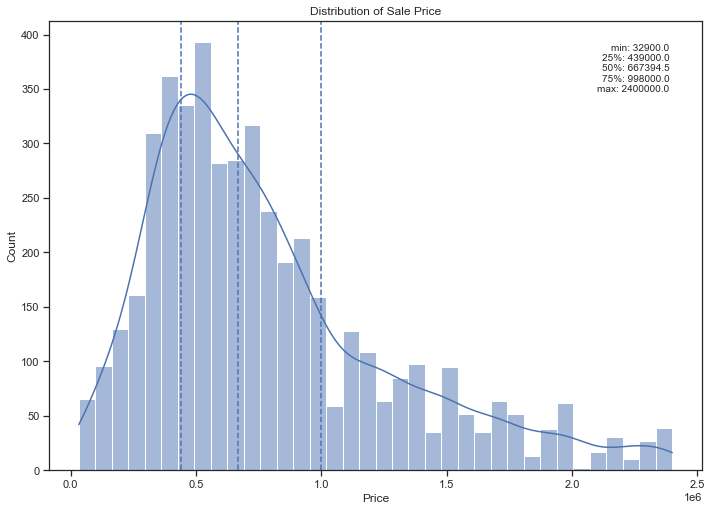

In [327]:
# Plotted the prices of all the counties to see how well the data is distributed. 
# We can conclude that price is positively skewed and mean > mode 
# which tells that there are outliers on the higher range of price of house listing
x = 'Price'
fig, ax = plt.subplots()
ax.title.set_text('Distribution of Sale Price')
variable = df[x].fillna(df[x].mean())
sns.histplot(variable, kde=True)
des = df[x].describe()
ax.axvline(des["25%"], ls='--')
ax.axvline(des["50%"], ls='--')
ax.axvline(des["75%"], ls='--')
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "50%: "+des["50%"], "75%: "+des["75%"], "max: "+des["max"]))
ax.text(0.95, 0.95, box, transform=ax.transAxes, fontsize=10, va='top', 
        ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
sns.set(rc={'figure.figsize':(11.7,8.27)})

plt.show()


<AxesSubplot:>

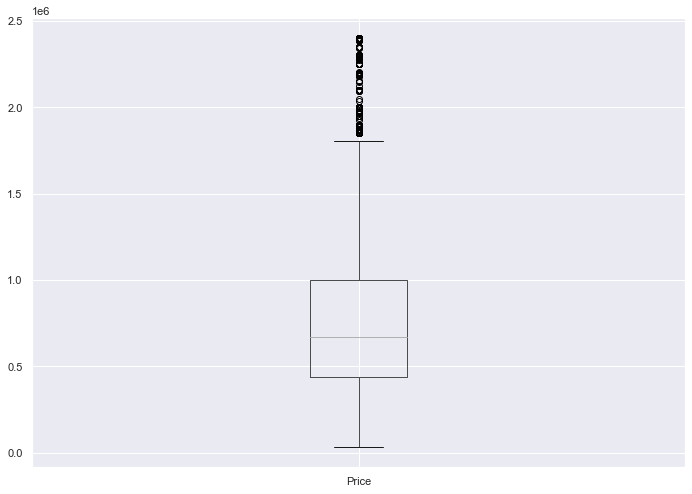

In [328]:
#Boxplot showing that there are more number of outliers on the higher range of price
df.boxplot(column=['Price'])

# Analysis on price per sqft, beds and bath

In [329]:
#Creating a column for Price per sqft
df['Price_per_sqft'] = (df['Price']/df['Sqft']).round(2)
df


,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft
0,1660 trowville ln,Hayward,Alameda-County,Ca,94545,799000.0,48.0,66.0,3.0,2.0,1119.0,Single family residential,1956.0,Coming soon,714.03
1,2172 rapallo cmn,Livermore,Alameda-County,Ca,94551,1100000.0,54.0,74.0,4.0,2.5,2061.0,Single family residential,2003.0,New,533.72
2,3411 vittoria loop,Dublin,Alameda-County,Ca,94568,1545000.0,28.0,54.0,3.0,3.0,1966.0,Single family residential,2014.0,New,785.86
3,4822 la habra,Union city,Alameda-County,Ca,94587,1345000.0,20.0,58.0,3.0,2.0,1388.0,Single family residential,1980.0,New,969.02
4,2608 64th ave,Oakland,Alameda-County,Ca,94605,649000.0,86.0,62.0,2.0,1.0,1026.0,Single family residential,1945.0,New,632.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,15853 vierra rd,Rackerby,Yuba-County,Ca,95972,649000.0,0.0,6.0,4.0,2.0,1716.0,Mobile/manufactured home,1998.0,Active,378.21
4657,16879 dolores ln,Brownsville,Yuba-County,Ca,95919,625000.0,0.0,6.0,3.0,2.0,1612.0,Multi-family (2-4 unit),1974.0,Active,387.72
4658,13418 rices crossing rd,Oregon house,Yuba-County,Ca,95962,925000.0,16.0,29.0,3.0,2.0,2312.0,Single family residential,1972.0,Active,400.09
4659,4694 fruitland rd,Marysville,Yuba-County,Ca,95901,169900.0,0.0,8.0,2.0,2.0,1100.0,Mobile/manufactured home,1972.0,Active,154.45


In [330]:
#Average price of price_per_sqft for all the cities of Northern California

a = df.groupby(by="City")
b = pd.DataFrame(a['Price_per_sqft'].mean().round(2))
b

,Price_per_sqft
City,
Acampo,411.32
Ahwahnee,286.77
Alameda,666.57
Albany,804.35
Alta,248.22
...,...
Woodbridge,293.76
Woodland,344.30
Yankee hill,391.58


In [331]:
# Top 10 and Bottom 10 cities in CA as per the Average price per square feet

Top10 = pd.DataFrame(b.sort_values(by = 'Price_per_sqft',ascending=False).head(10))
print(Top10)
Top10['Stack'] = 'Top10'

Bottom10 = pd.DataFrame(b.sort_values(by = 'Price_per_sqft',ascending=False).tail(10))
print(Bottom10)
Bottom10['Stack'] = 'Bottom10'

             Price_per_sqft
City                       
Lockwood            4000.00
Amador city         3666.67
Saratoga            1708.71
Thornton            1456.66
Rutherford          1289.71
Carmel              1281.89
Kentfield           1247.50
Cupertino           1231.48
Palo alto           1212.11
Tahoe city          1157.81
                   Price_per_sqft
City                             
La grange                  160.26
Firebaugh                  158.33
Robbins                    156.97
Miramonte                  156.25
Hamilton city              156.12
Dunnigan                   115.98
Strawberry valley          101.64
Empire                      93.90
Weimar                      84.82
Avery                       78.61


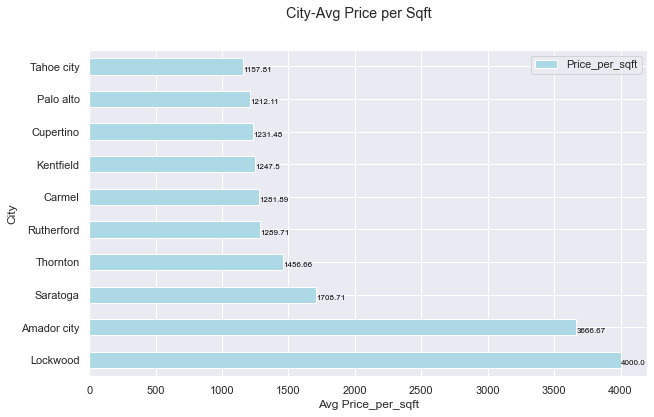

In [332]:
#Top 10 cities in CA as per the Average price per square feet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

 
# Horizontal Bar Plot
ax = Top10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price_per_sqft")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City-Avg Price per Sqft')
# Show Plot
plt.show()

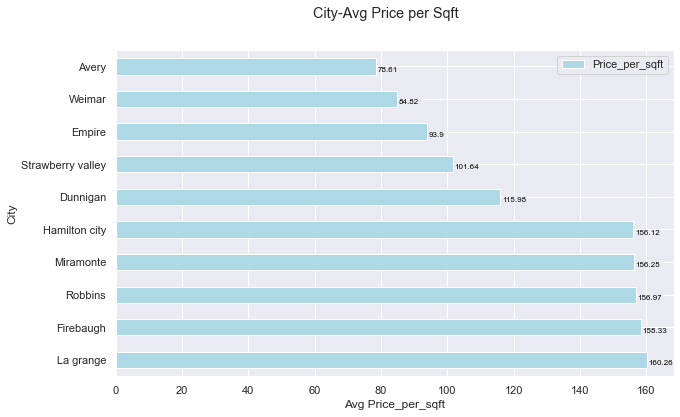

In [333]:
#Bottom 10 cities in CA as per the Average price per square feet

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

 
# Horizontal Bar Plot
ax = Bottom10.plot(kind='barh',color='lightblue',figsize=(10,6))
plt.xlabel("Avg Price_per_sqft")
plt.ylabel("City") 

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.4, i.get_y()+0.1,
             str(round((i.get_width()), 2)),
             fontsize = 8, color ='black')
    
plt.suptitle('City-Avg Price per Sqft')
# Show Plot
plt.show()

In [334]:
# Number of beds/ bath countywise - total properties

Total_properties = df['County'].value_counts() 
print(Total_properties)

df[['County','Beds', 'Bath']]

San-Joaquin-County      325
Alameda-County          312
Santa-Clara-County      271
Stanislaus-County       270
Fresno-County           266
El-Dorado-County        259
Solano-County           253
Placer-County           246
San-Francisco-County    240
San-Mateo-County        221
Sonoma-County           216
Nevada-County           185
Madera-County           175
Butte-County            171
Lake-County             159
Monterey-County         152
Santa-Cruz-County       137
Marin-County            107
Yuba-County             104
Napa-County              97
Calaveras-County         88
Yolo-County              82
Amador-County            81
Sutter-County            61
San-Benito-County        52
Mariposa-County          52
Glenn-County             38
Alpine-County            17
Colusa-County            15
Name: County, dtype: int64


,County,Beds,Bath
0,Alameda-County,3.0,2.0
1,Alameda-County,4.0,2.5
2,Alameda-County,3.0,3.0
3,Alameda-County,3.0,2.0
4,Alameda-County,2.0,1.0
...,...,...,...
4656,Yuba-County,4.0,2.0
4657,Yuba-County,3.0,2.0
4658,Yuba-County,3.0,2.0
4659,Yuba-County,2.0,2.0


In [335]:
#number of houses with total bed in different county

xt = pd.crosstab(df['County'],df['Beds'])
print(xt)

Beds                  0.0  1.0  2.0  3.0  4.0  5.0  6.0  7.0
County                                                      
Alameda-County          1   19   93  103   72   14    9    1
Alpine-County           0    8    4    3    2    0    0    0
Amador-County           0    3   22   46    8    1    1    0
Butte-County            0    6   44   84   28    8    1    0
Calaveras-County        2    4   18   50   11    3    0    0
Colusa-County           0    0    5    6    3    0    1    0
El-Dorado-County        0    7   36  121   69   19    6    1
Fresno-County           0    5   38  135   65   21    1    1
Glenn-County            0    0    9   16   10    2    1    0
Lake-County             0    5   57   74   18    3    2    0
Madera-County           0    4   19   78   55   15    3    1
Marin-County            1   21   30   41   11    3    0    0
Mariposa-County         0    0   17   25    8    0    2    0
Monterey-County         0    7   38   66   33    5    3    0
Napa-County             

In [336]:
#Total properties according to no of beds

c = df.sort_values(by ='Beds')
Series = c['Beds'].value_counts() 
Series

3.0    1977
2.0    1078
4.0    1013
5.0     254
1.0     239
6.0      55
0.0      25
7.0      11
Name: Beds, dtype: int64

In [337]:
#Average price of house with no of bed in top 10 city

ct = pd.crosstab(index=df['City'], columns=df['Beds'], values=df['Price'], margins=True, aggfunc='mean').replace(np.nan, 0).astype(np.int64)


ct.loc[['Lockwood','Amador city','Saratoga', 'Thornton', 'Rutherford', 'Carmel', 'Kentfield', 'Cupertino', 'Palo alto', 'Tahoe city'],[1,2,3,4,5]]

Beds,1,2,3,4,5
City,,,,,
Lockwood,1100000,0,0,0,0
Amador city,2200000,0,0,0,0
Saratoga,0,2100000,0,0,0
Thornton,0,1274950,1100000,0,0
Rutherford,0,0,2395000,0,0
Carmel,1700000,1606000,1714500,1795000,0
Kentfield,0,0,1749000,0,0
Cupertino,0,0,1700000,2388000,0
Palo alto,978000,0,1614294,2388000,0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Lockwood'),
  Text(1, 0, 'Amador city'),
  Text(2, 0, 'Saratoga'),
  Text(3, 0, 'Thornton'),
  Text(4, 0, 'Rutherford'),
  Text(5, 0, 'Carmel'),
  Text(6, 0, 'Kentfield'),
  Text(7, 0, 'Cupertino'),
  Text(8, 0, 'Palo alto'),
  Text(9, 0, 'Tahoe city')])

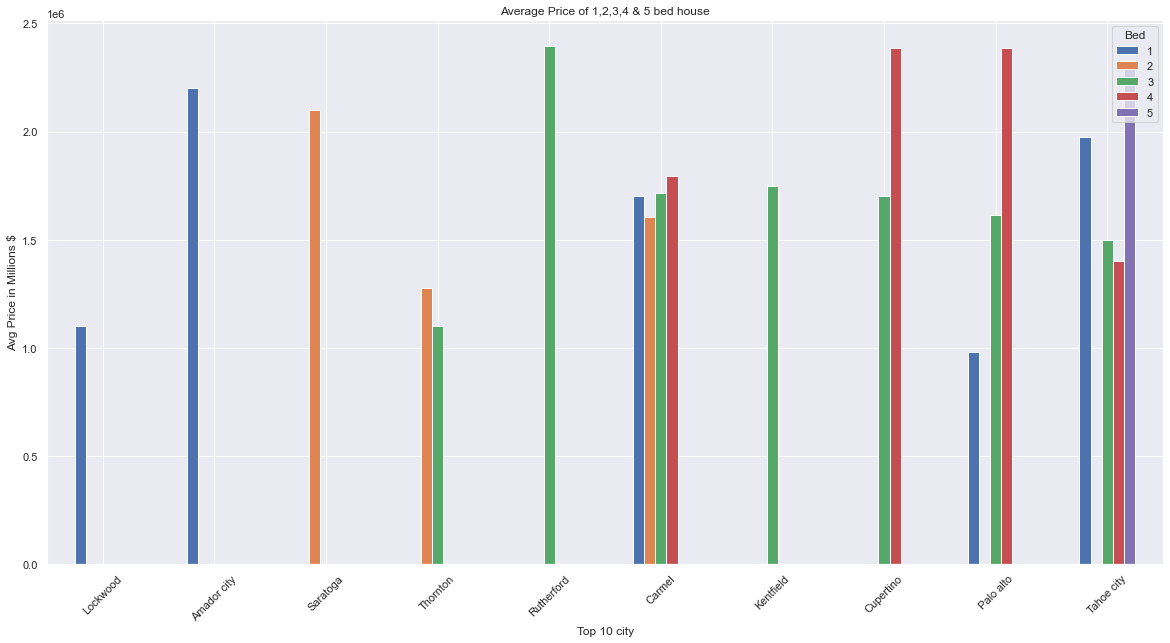

In [338]:
#Average prices of house per bed

ct.loc[['Lockwood','Amador city','Saratoga', 'Thornton', 'Rutherford', 'Carmel', 'Kentfield', 'Cupertino', 'Palo alto', 'Tahoe city'],[1,2,3,4,5]].plot.bar(figsize=(20,10))

plt.title('Average Price of 1,2,3,4 & 5 bed house')
plt.ylabel('Avg Price in Millions $')
plt.xlabel('Top 10 city')
plt.legend(loc = 'upper right', ncol = 1, title = "Bed")
plt.xticks(rotation = 45)

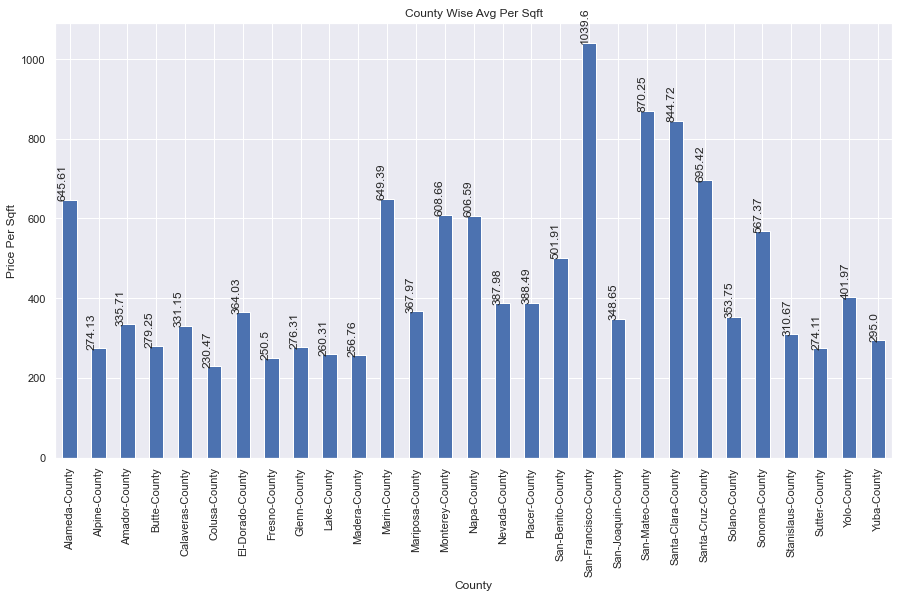

In [339]:
#Bar plot of county and average price per sqft
dfg = df.groupby(['County'])['Price_per_sqft'].mean().round(2)
ax = dfg.plot(kind='bar', figsize = (15,8))
plt.ylabel("Price Per Sqft")
plt.title('County Wise Avg Per Sqft')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005), horizontalalignment='center', rotation='vertical')


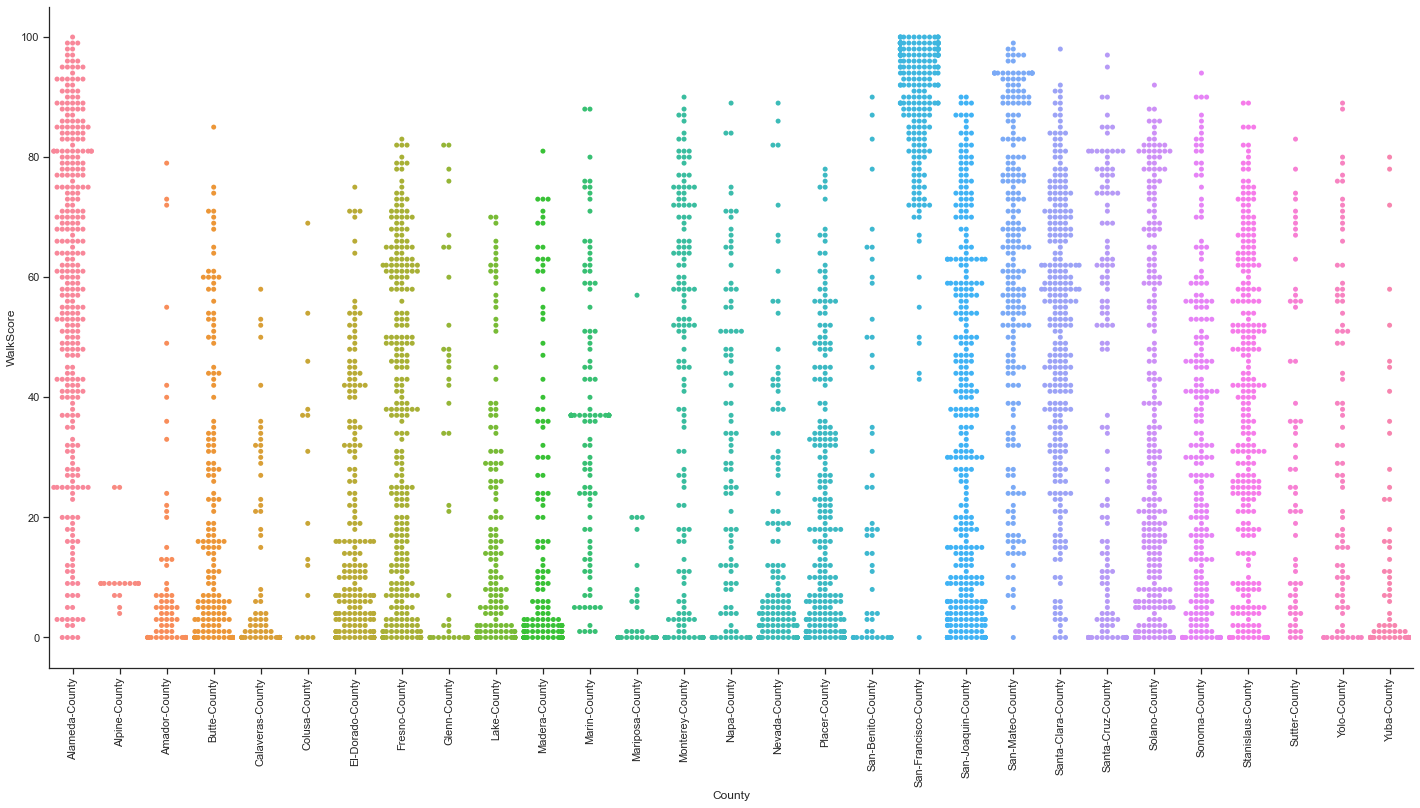

In [340]:
#Catplot of walkscore and bike score to check range of scores county wise
import matplotlib.pyplot as plot
import warnings
warnings.filterwarnings('ignore')
new_df = df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="WalkScore", data=new_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

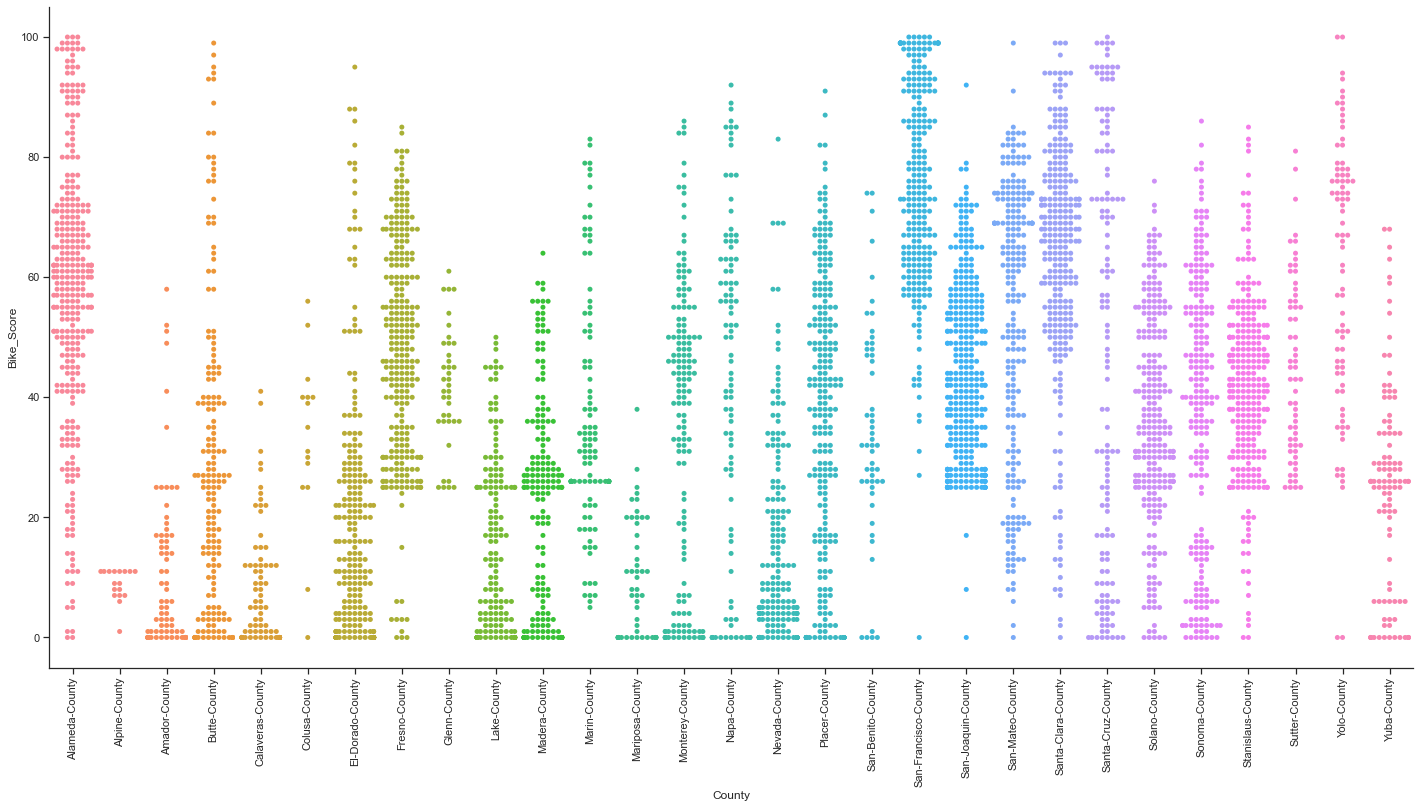

In [341]:

warnings.filterwarnings('ignore')
new_df = df.dropna(subset=['County', 'WalkScore', 'Bike_Score'])

sns.set_theme(style="ticks", color_codes=True)
g = sns.catplot(x="County", y="Bike_Score", data=new_df, height=10, aspect=20/10, kind='swarm')
g.set_xticklabels(rotation=90)

In [342]:
#Categorizing scores into ordinal categories

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Alameda-County'),
  Text(1, 0, 'Monterey-County'),
  Text(2, 0, 'San-Francisco-County'),
  Text(3, 0, 'San-Joaquin-County'),
  Text(4, 0, 'San-Mateo-County'),
  Text(5, 0, 'Santa-Clara-County'),
  Text(6, 0, 'Solano-County'),
  Text(7, 0, 'Stanislaus-County')])

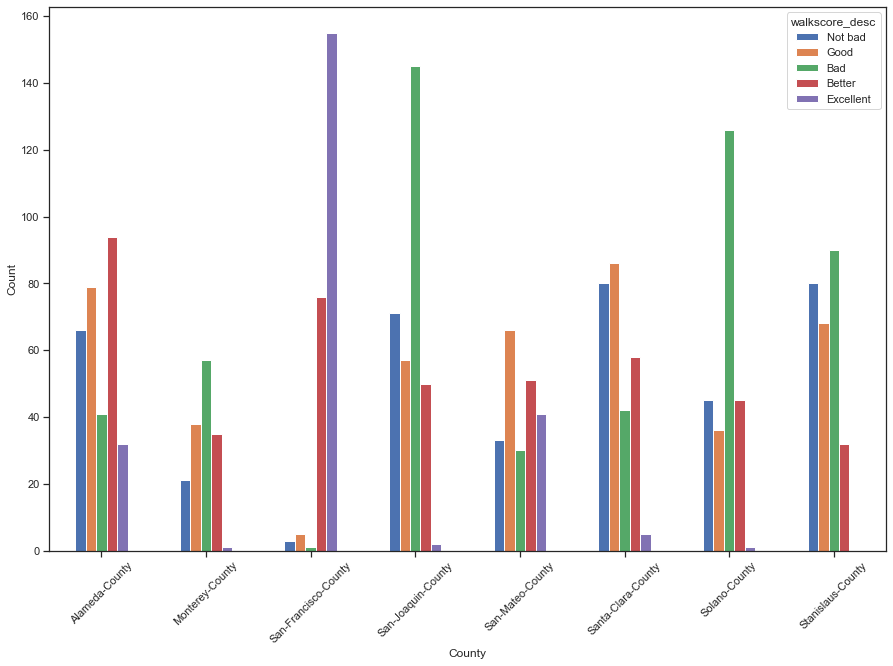

In [343]:
walkscore_desc_list = []
for t in df['WalkScore']:
    if t <= 100 and t >= 90:
        walkscore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        walkscore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        walkscore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        walkscore_desc_list.append('Not bad')
    elif t <= 24 and t >= 0:
        walkscore_desc_list.append('Bad')
    else:
        walkscore_desc_list.append('')
df['walkscore_desc'] = walkscore_desc_list
g = pd.crosstab(df['County'], df['walkscore_desc'])
County_8 = ['Alameda-County','Monterey-County','San-Francisco-County','San-Joaquin-County',
            'San-Mateo-County','Santa-Clara-County','Solano-County', 'Stanislaus-County']
unique_ts = list(df['walkscore_desc'].unique())
g.loc[County_8, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Alameda-County'),
  Text(1, 0, 'Fresno-County'),
  Text(2, 0, 'San-Francisco-County'),
  Text(3, 0, 'San-Joaquin-County'),
  Text(4, 0, 'San-Mateo-County'),
  Text(5, 0, 'Santa-Clara-County'),
  Text(6, 0, 'Santa-Cruz-County'),
  Text(7, 0, 'Stanislaus-County')])

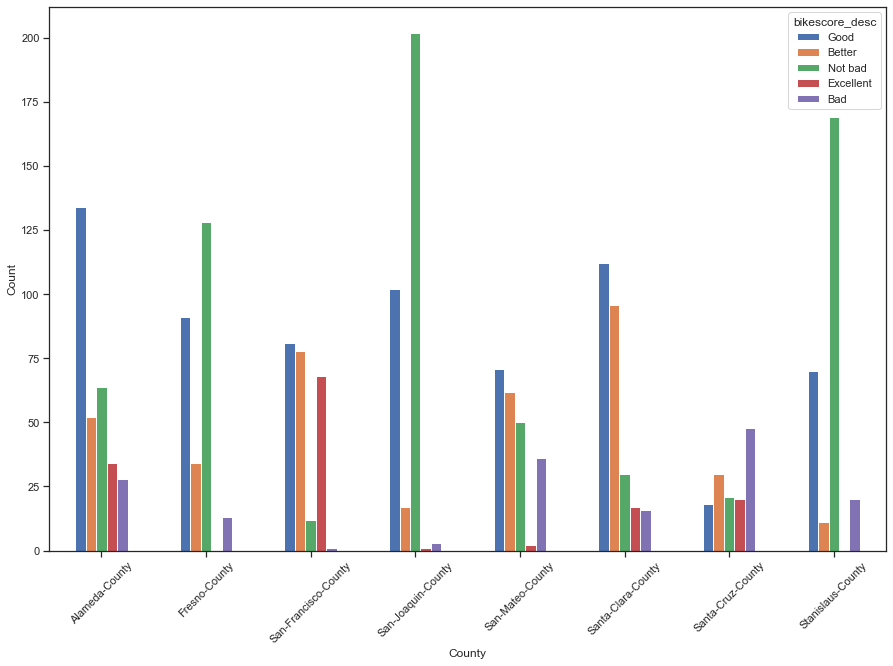

In [344]:
bikescore_desc_list = []
for t in df['Bike_Score']:
    if t <= 100 and t >= 90:
        bikescore_desc_list.append('Excellent')
    elif t <= 89 and t >= 70:
        bikescore_desc_list.append('Better')
    elif t <= 69 and t >= 50:
        bikescore_desc_list.append('Good')
    elif t <= 49 and t >= 25:
        bikescore_desc_list.append('Not bad')
    elif t <= 24 and t >= 0:
        bikescore_desc_list.append('Bad')
    else:
        bikescore_desc_list.append('')
df['bikescore_desc'] = bikescore_desc_list
g = pd.crosstab(df['County'], df['bikescore_desc'])
County_8 = ['Alameda-County','Fresno-County','San-Francisco-County','San-Joaquin-County',
            'San-Mateo-County','Santa-Clara-County','Santa-Cruz-County','Stanislaus-County']
unique_ts = list(df['bikescore_desc'].unique())
g.loc[County_8, unique_ts].plot.bar(figsize=(15,10))
plot.xlabel('County')
plot.ylabel('Count')
plot.xticks(rotation=45)

In [345]:
# Price range based on the walkscore and bikescore (averaged for each county)

Text(0.5, 1.0, 'Correlation between Price and WalkScores')

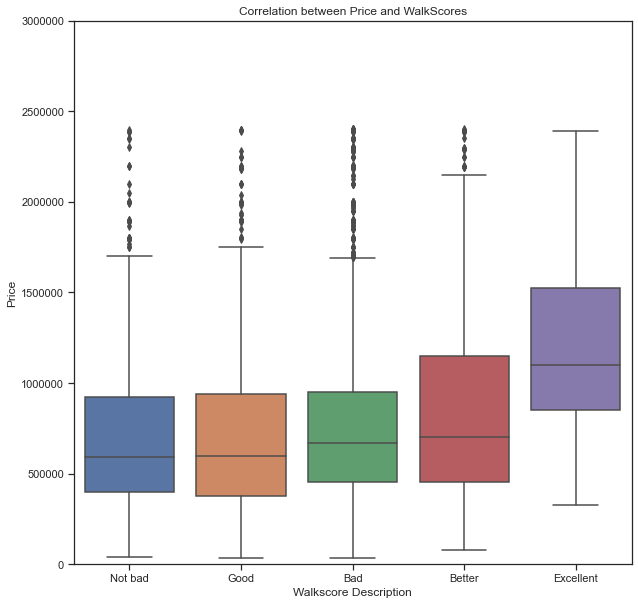

In [346]:

plot.figure(figsize=(10,10))
sns.boxplot(x="walkscore_desc", y="Price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Walkscore Description")
plot.title("Correlation between Price and WalkScores")

Text(0.5, 1.0, 'Correlation between Price and BikeScores')

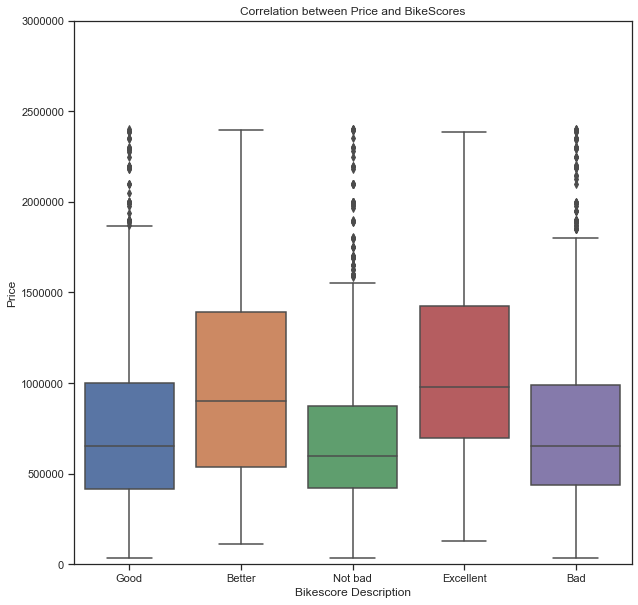

In [347]:
plot.figure(figsize=(10,10))
sns.boxplot(x="bikescore_desc", y="Price", data=df)
plot.ticklabel_format(style='plain', axis='y')
plot.ylim(0, 3000000)
plot.ylabel("Price")
plot.xlabel("Bikescore Description")
plot.title("Correlation between Price and BikeScores")

In [348]:
#Crosstab between county & status, county & property type to see how manu properties belong to different categories
#of status and property type

In [349]:
xt = pd.crosstab(df['County'],df['Status'])
xt

Status,Active,Active under contract,Active-reo,Back on market,Backup,Closed,Coming soon,Contingent,Contingent (no show),Contingent (show),Contingent - no show,Contingent - show,New,Pending,Pending (do not show),Pending - bring backup,Pending - show for backups,Pending sale,Price change,Sold
County,,,,,,,,,,,,,,,,,,,,
Alameda-County,66,0,1,0,0,0,1,0,0,0,0,0,237,2,1,0,0,0,4,0
Alpine-County,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Amador-County,80,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Butte-County,165,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
Calaveras-County,87,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Colusa-County,14,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
El-Dorado-County,252,0,0,0,0,0,0,1,0,0,0,0,0,4,0,2,0,0,0,0
Fresno-County,259,0,0,0,3,0,0,0,0,0,0,0,0,3,1,0,0,0,0,0
Glenn-County,38,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [350]:
xt = pd.crosstab(df['County'],df['Property_Type'])
xt

Property_Type,Cabin,Co-op,Commercial/residential,Condo,Condo/co-op,Detached,Double-wide mobile home,Duplex,Fourplex,Manufactured on land,...,"Residential, single family","Residential, townhouse",Single family,Single family home,Single family residence,Single family residential,Single-wide mobile home,Townhouse,Triple-wide mobile home,Triplex
County,,,,,,,,,,,,,,,,,,,,,
Alameda-County,0,0,0,67,0,0,2,0,0,0,...,0,0,0,19,0,166,0,36,0,1
Alpine-County,0,0,0,13,0,0,0,0,0,0,...,2,1,0,0,1,0,0,0,0,0
Amador-County,0,0,0,2,0,0,0,0,0,0,...,1,1,3,0,0,58,0,0,0,0
Butte-County,0,0,1,1,0,0,0,2,0,26,...,0,0,0,0,111,15,0,1,0,0
Calaveras-County,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,70,0,0,0,0
Colusa-County,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,10,0,0,0,0
El-Dorado-County,0,0,0,3,0,0,0,0,0,0,...,25,1,0,3,0,190,0,2,0,0
Fresno-County,0,0,0,12,0,0,0,0,0,1,...,0,0,0,1,17,2,0,0,0,0
Glenn-County,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,30,3,0,0,0,0


In [351]:
#Categorizing property types into generic categories

In [352]:
Property_Type_Category =[]
for i in df['Property_Type']:
    if i in ['Single family', 'Single family home', 'Single family residence',
                'Single family residential','Single-wide mobile home']:
        Property_Type_Category.append('Single')
        
    elif i in ['Residential, single family', 'Residential, townhouse', 'Townhouse']:
        Property_Type_Category.append('Residential')
        
    elif i in ['Cabin', 'Co-op', 'Condo', 'Condo/co-op']:
        Property_Type_Category.append('Condo')
        
    else :
        Property_Type_Category.append('Others')

In [353]:
df['Property_Type_Category'] =Property_Type_Category
df

,Street,City,County,State,Zipcode,Price,WalkScore,Bike_Score,Beds,Bath,Sqft,Property_Type,Year_Built,Status,Price_per_sqft,walkscore_desc,bikescore_desc,Property_Type_Category
0,1660 trowville ln,Hayward,Alameda-County,Ca,94545,799000.0,48.0,66.0,3.0,2.0,1119.0,Single family residential,1956.0,Coming soon,714.03,Not bad,Good,Single
1,2172 rapallo cmn,Livermore,Alameda-County,Ca,94551,1100000.0,54.0,74.0,4.0,2.5,2061.0,Single family residential,2003.0,New,533.72,Good,Better,Single
2,3411 vittoria loop,Dublin,Alameda-County,Ca,94568,1545000.0,28.0,54.0,3.0,3.0,1966.0,Single family residential,2014.0,New,785.86,Not bad,Good,Single
3,4822 la habra,Union city,Alameda-County,Ca,94587,1345000.0,20.0,58.0,3.0,2.0,1388.0,Single family residential,1980.0,New,969.02,Bad,Good,Single
4,2608 64th ave,Oakland,Alameda-County,Ca,94605,649000.0,86.0,62.0,2.0,1.0,1026.0,Single family residential,1945.0,New,632.55,Better,Good,Single
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4656,15853 vierra rd,Rackerby,Yuba-County,Ca,95972,649000.0,0.0,6.0,4.0,2.0,1716.0,Mobile/manufactured home,1998.0,Active,378.21,Bad,Bad,Others
4657,16879 dolores ln,Brownsville,Yuba-County,Ca,95919,625000.0,0.0,6.0,3.0,2.0,1612.0,Multi-family (2-4 unit),1974.0,Active,387.72,Bad,Bad,Others
4658,13418 rices crossing rd,Oregon house,Yuba-County,Ca,95962,925000.0,16.0,29.0,3.0,2.0,2312.0,Single family residential,1972.0,Active,400.09,Bad,Not bad,Single
4659,4694 fruitland rd,Marysville,Yuba-County,Ca,95901,169900.0,0.0,8.0,2.0,2.0,1100.0,Mobile/manufactured home,1972.0,Active,154.45,Bad,Bad,Others


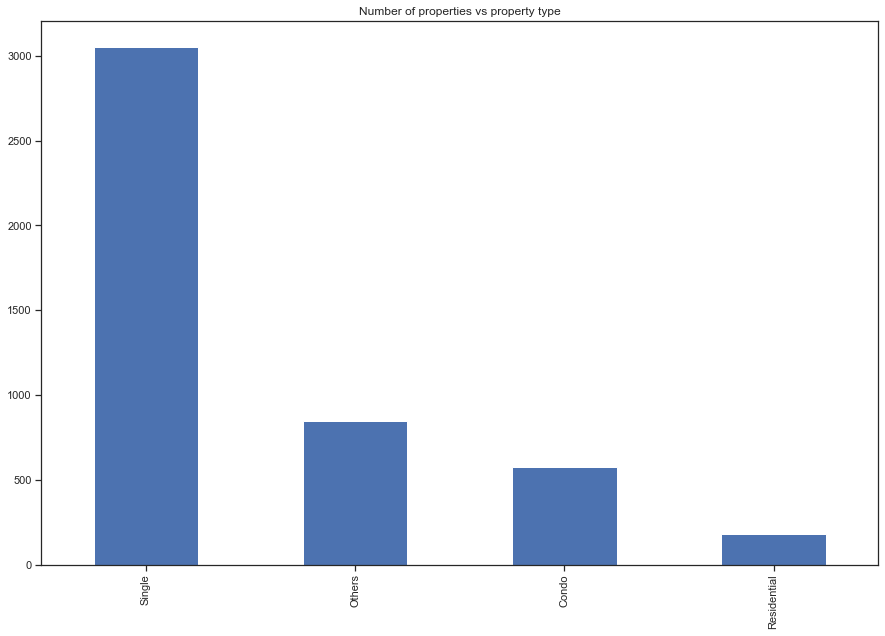

In [354]:
#Bar plot of Proeprty type category vs Number of properties
ax = df['Property_Type_Category'].value_counts().plot(kind='bar',figsize=(15,10),
                                                      title='Number of properties vs property type')

# Prediction Analysis

<AxesSubplot:>

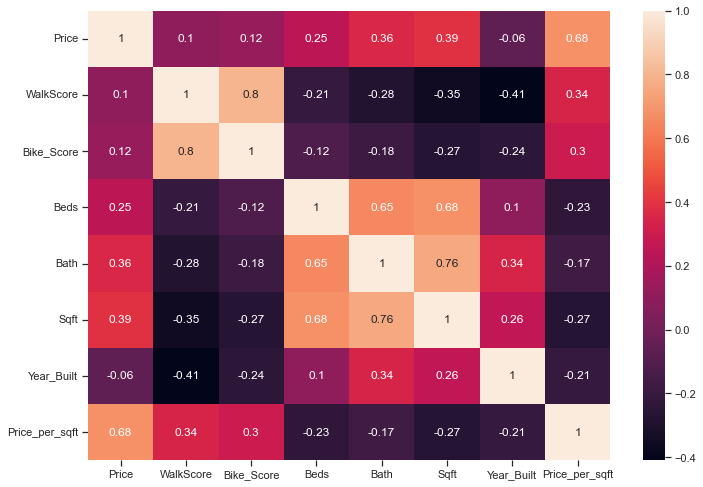

In [367]:
#Plotting correlation matrix to see how Price is correlated with other variables
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)
# It shows price is correlated to Sqft followed by Bath and Bed.
# It also shows that years built has almost no correlation with price which means land maintains its 
#value over the years and additional significant modification done on the property would not result in significant gain.

In [356]:
#X - columns that will be used for prediction
#Y - target variable that will be predicted

In [357]:
#Including attributes with positive correlation as independent variables
X=df[['WalkScore','Bike_Score','Beds','Bath','Sqft']]

In [358]:
Y=df['Price'].values

In [359]:
#splitting data into test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.8)

In [360]:
#fitting and transforming model
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.fit_transform(X_test.astype(np.float))

In [361]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [362]:
#intercept and slope
print(regressor.intercept_)
print(regressor.coef_)

786282.1918839022
[ 94539.56150174  43373.35367132 -52914.31596867 101583.29690092
 194288.50692408]


In [363]:
#predicting the test data
Y_pred = regressor.predict(X_test)

<AxesSubplot:ylabel='Density'>

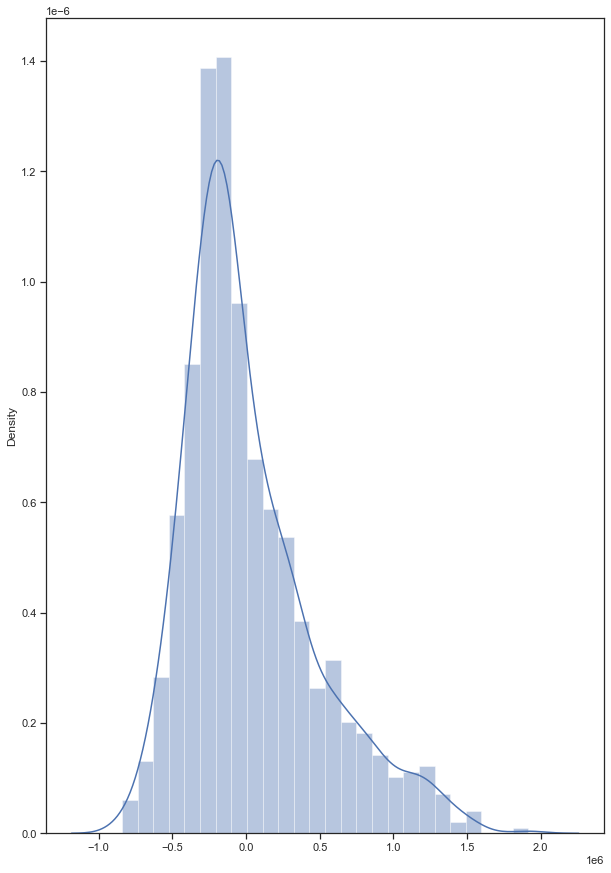

In [364]:
#plotting residuals graph 
fig = plt.figure(figsize=(10,15))
residuals = (Y_test - Y_pred)
sns.distplot(residuals)


In [365]:
#actual vs predicted and errors
df_pred = pd.DataFrame({'Actual':Y_test,'Predicted':Y_pred})
print(df_pred.head())
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(Y_test,Y_pred)) 
print('Mean Squared Error: ', metrics.mean_squared_error(Y_test,Y_pred)) 
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_absolute_error(Y_test,Y_pred)))
print('Variance Score: ', metrics.explained_variance_score(Y_test,Y_pred))

      Actual      Predicted
0   385000.0  949435.352049
1  1225000.0  992315.043115
2  1149000.0  808597.137449
3   489000.0  802290.109154
4   710000.0  621799.997328
Mean Absolute Error:  341983.7837557191
Mean Squared Error:  200890015918.50107
Root Mean Squared Error:  584.793795927863
Variance Score:  0.2335471238854352


                    Coeff
Bath        143847.969775
WalkScore     3214.257987
Bike_Score    1907.916053
Sqft           261.868897
Beds        -47834.959667


R^2 is:  0.23100871934076028


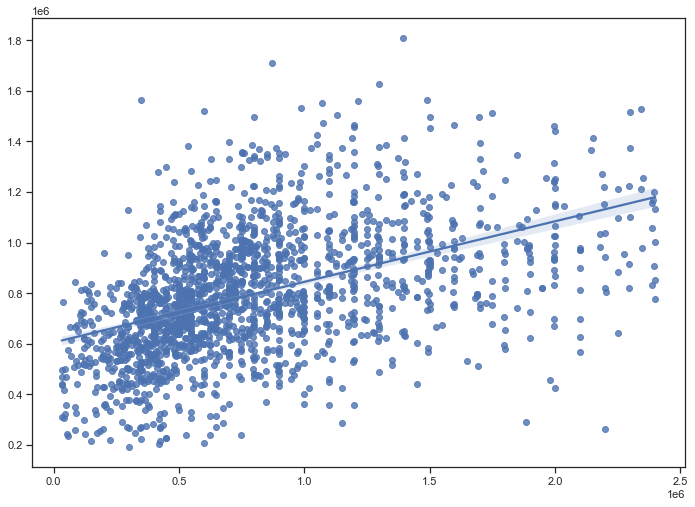

In [366]:
lm=LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.40, random_state=101)

lm.fit(X_train,Y_train) #fitting the model

predictions=lm.predict(X_test) #calculating predictions based on the model creaated in previous line

sns.regplot(Y_test,predictions,fit_reg=True) #plotting the model

cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) #Creating a datframe of coefficients obtained from the model
print(cdf.sort_values(by='Coeff',ascending=False))

print("\n")

print("R^2 is: ",lm.score(X,Y))